In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df_raw=pd.read_csv("/home/piai/Desktop/최종/insu_pre_review.csv", engine='python', encoding='EUC-KR')
df_raw.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df_raw_blood=df_raw[df_raw["review_cat"]=="혈액검사"]

In [4]:
df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='거절']=1

<ipython-input-4-c825a8209013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-4-c825a8209013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
<ipython-input-4-c

In [5]:
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0

<ipython-input-5-ccb828b7e37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
<ipython-input-5-ccb828b7e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0


In [6]:
df_raw_blood_man=df_raw_blood[df_raw_blood["gender"]==1]
df_raw_blood_man

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,0,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,C112356,혈액검사,0,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,1,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,C112361,혈액검사,0,2015-06-28,1,70,169,70,98.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,C112363,혈액검사,0,2014-12-22,1,69,164,67,98.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,C134204,혈액검사,1,2015-03-10,1,54,180,83,95.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14911,C134205,혈액검사,0,2014-10-22,1,68,165,57,87.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14912,C134207,혈액검사,0,2015-04-02,1,60,165,74,100.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14913,C134208,혈액검사,0,2015-01-15,1,60,169,66,94.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_raw_blood_man=df_raw_blood_man.drop(["customer_id","review_cat","review_date","gender","bust","bp_max","bp_min",\
                                        "pulse_count","judge_score","bt_chol_judge","bt_crea_judge","bt_gluc_judge","bt_hb_judge",\
                                        "bt_hbsa_judge","bt_hct_judge","bt_mch_judge","bt_mchc_judge","bt_mvc_judge","bt_plat_judge",\
                                        "bt_rbc_judge","bt_wbc_judge","bt_rgpt_judge","bt_sgot_judge","bt_sgpt_judge","bt_trig_judge"],axis=1)

In [8]:
df_raw_blood_man.dropna(inplace=True)

In [9]:
df_raw_blood_man["judge"] = df_raw_blood_man["judge"].astype(int)

In [10]:
df_train, df_test = train_test_split(df_raw_blood_man, test_size = 0.3, random_state = 1234)

df_train_x = df_train.drop('judge',axis=1)
df_train_y = df_train['judge']

df_test_x = df_test.drop('judge',axis=1)
df_test_y = df_test['judge']

In [11]:
# 범주형 데이터 원핫인코딩 변환
df_raw_dummy = pd.get_dummies(df_raw_blood_man)
df_raw_dummy.shape

(2146, 24)

In [12]:
df_raw_y=df_raw_dummy["judge"]
df_raw_x=df_raw_dummy.drop(["judge"], axis=1,inplace=False)

In [13]:
print(df_train_x.shape, df_test_x.shape)

(1502, 22) (644, 22)


In [14]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.796
Accuracy on test set:0.752


In [15]:
knn_uncustomized

KNeighborsClassifier()

In [16]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["TestAccuacy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,TestAccuacy
0,1,1.000,0.669
1,2,0.832,0.750
2,3,0.836,0.710
3,4,0.792,0.766
4,5,0.796,0.752
5,6,0.783,0.762
6,7,0.786,0.753
7,8,0.773,0.755
8,9,0.774,0.750
9,10,0.771,0.753


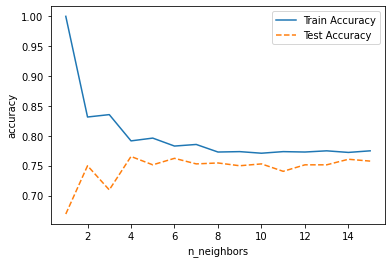

In [17]:
#178
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

n_neighbors = 4

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
#이웃 수
para_n_neighbors = [i for i in range(1,11)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.669
1,2,uniform,0.832,0.750
2,3,uniform,0.836,0.710
3,4,uniform,0.792,0.766
4,5,uniform,0.796,0.752
5,6,uniform,0.783,0.762
6,7,uniform,0.786,0.753
7,8,uniform,0.773,0.755
8,9,uniform,0.774,0.750
9,10,uniform,0.771,0.753


In [19]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.669255,0.669255
2,1.0,0.831558,0.669255,0.750000
3,1.0,0.835553,0.708075,0.709627
4,1.0,0.791611,0.720497,0.765528
5,1.0,0.796272,0.748447,0.751553


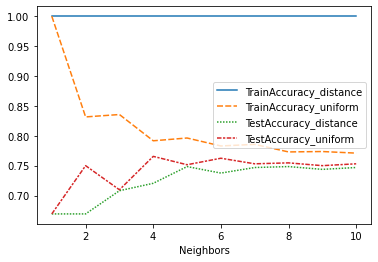

In [20]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [21]:
weights="uniform"

In [22]:
## train 및 정확도 결과 저장용
train_accuracy=[];test_accuracy=[]

## 이웃수
para_n_neighbors = [i for i in range(1,11)]*3

## 거리계산 방법 (minkowki,euclidean,manhattan )
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
    
# 데이터 테이블 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.669
1,2,minkowski,0.832,0.750
2,3,minkowski,0.836,0.710
3,4,minkowski,0.792,0.766
4,5,minkowski,0.796,0.752
5,6,minkowski,0.783,0.762
6,7,minkowski,0.786,0.753
7,8,minkowski,0.773,0.755
8,9,minkowski,0.774,0.750
9,10,minkowski,0.771,0.753


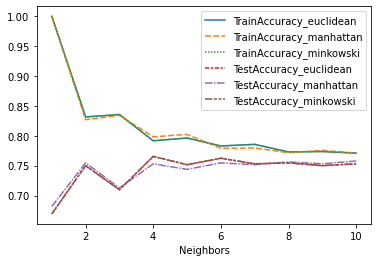

In [23]:
#정확도 그래프
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","TestAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [25]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="manhattan")
knn_model.fit(df_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("test data accuracy:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.798
test data accuracy:0.753
Confusion matrix:
[[479  12]
 [147   6]]
